In [150]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [151]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [152]:
df = pd.read_csv("Advertising.csv")

In [153]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Basic Information about DataFrame

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Droping unnecessary column

In [155]:
df.drop("Unnamed: 0",axis=1, inplace=True)

#### Number of rows and columns in the Dataset

In [156]:
df.shape

(200, 4)

#### Statistical Information of The Dataset

In [157]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Searching For any nulls values

In [158]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Searching for any duplicated values

In [159]:
df.duplicated().sum()

0

#### Searching for any Outliers using BoxPlot graph

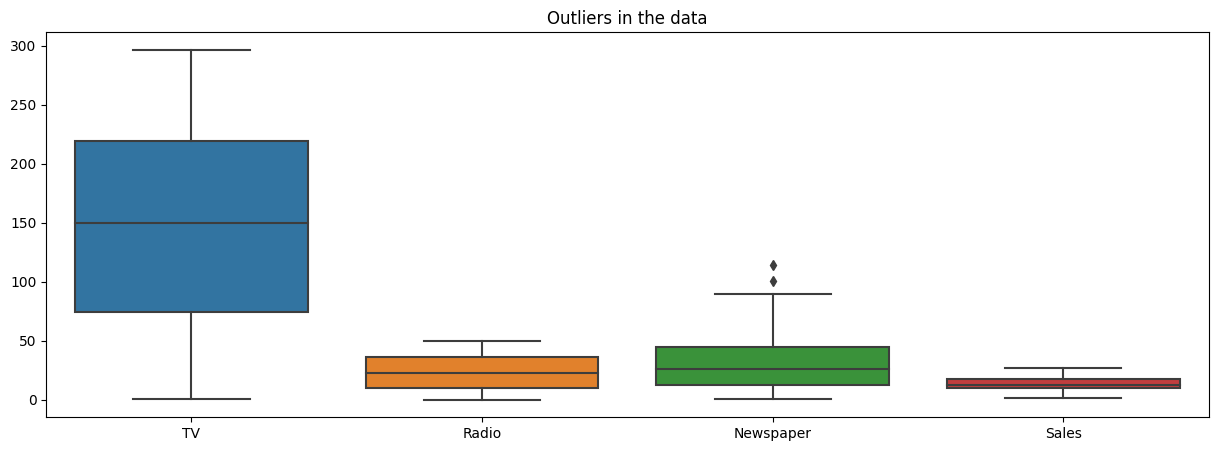

In [160]:
#check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

#### As we can see there are some outliers in Newspaper column that can create variation in our model, Due to which I am removing these outliers with the help of Inter Quartile Range.

In [161]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

TV           144.450
Radio         26.550
Newspaper     32.350
Sales          7.025
dtype: float64

#### LL = Lower limit
#### UL = Upper limit

In [162]:
LL = Q1 -1.5 * IQR
UL = Q3 + 1.5* IQR

#### Here i am fill all the outliers with null values and droping them using dropna() function

In [163]:
df = df[(df >= LL ) & (df <= UL)]
df = df.dropna()
df.shape

(198, 4)

#### Now again checking for outliers if any

In [165]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


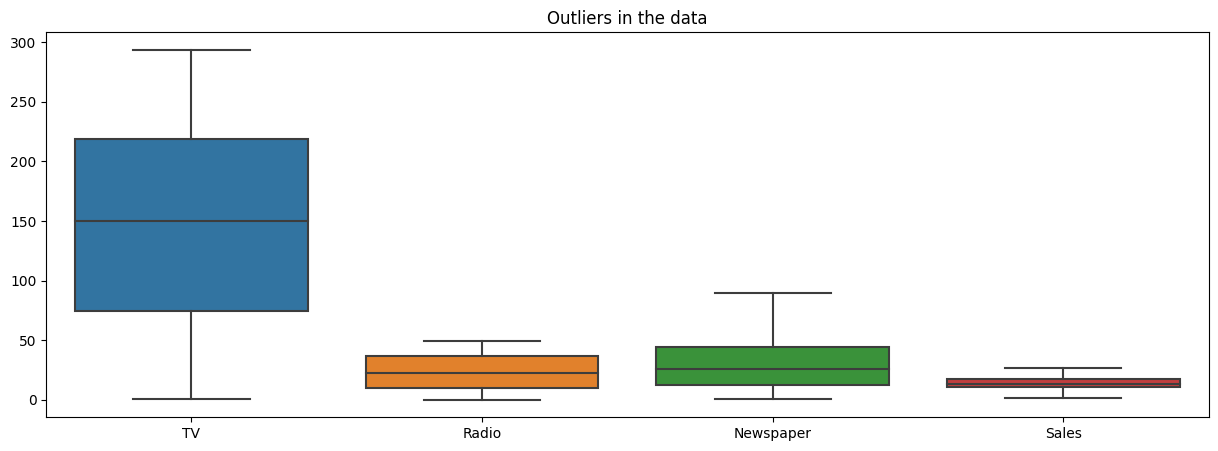

In [167]:
#check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


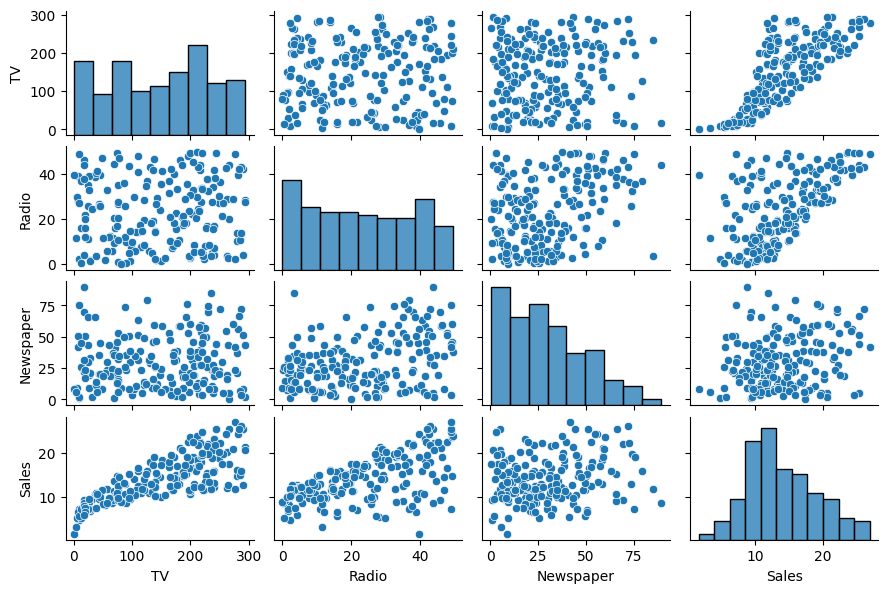

In [169]:
sns.pairplot(df, height=1.5, aspect=1.5)
plt.show()

#### Dividing Dataframe into X and Y, where x represents **Features** and y represents output **Label**

In [170]:
x = df.iloc[:, :-1]
y = df['Sales']

In [171]:
print("x column names: ",list(x.columns))
print("y column name:",y.name)

x column names:  ['TV', 'Radio', 'Newspaper']
y column name: Sales


#### Splitting dataframe intro 80:20 ratio where 80% will be training data and 20% will be testing data

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=10, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((158, 3), (40, 3), (158,), (40,))

### Importing required models

In [173]:
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import classification_report,accuracy_score,r2_score,mean_squared_error

In [174]:
linearR = LinearRegression()
model = DecisionTreeRegressor(random_state=10)


## LogisticRegression model

In [175]:
linearR.fit(x_train,y_train)

LinearRegression()

In [176]:
y_pred_LR = linearR.predict(x_test)
print("R2 score: ",r2_score(y_test, y_pred_LR))
print("mean square error: ",mean_squared_error(y_test, y_pred_LR))

R2 score:  0.7847276428213538
mean square error:  6.4722656729456585


## DecisionTreeRegressor Model

In [177]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [178]:
print("R2 score: ",r2_score(y_test, y_pred))
print("mean square error: ",mean_squared_error(y_test, y_pred))

R2 score:  0.9628643818200111
mean square error:  1.1164999999999998


### **Conclusion:** Out Of both Models Decission Tree regressor Works more accuratly